# Logistic Regression - FINAL - NoClassBalancing

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
file = "MLCleanData.csv"
#file = "COVID-19_Case_Surveillance_2021-11-21.csv"
full_results_df1 = pd.read_csv(file)
full_results_df1

,res_state,age_group,sex,race,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,outcome
0,IA,50 to 64 years,Male,White,Symptomatic,Yes,No,No,Yes,NaN
1,OH,18 to 49 years,Female,Multiple/Other,Symptomatic,No,No,No,Yes,NaN
2,IA,0 - 17 years,Male,White,Symptomatic,No,No,No,Yes,NaN
3,KS,18 to 49 years,Female,White,Symptomatic,No,No,No,Yes,NaN
4,OH,18 to 49 years,Male,White,Symptomatic,No,No,No,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...
222339,NC,18 to 49 years,Male,White,Symptomatic,Yes,No,No,Yes,NaN
222340,NC,65+ years,Male,White,Symptomatic,Yes,Yes,Yes,Yes,NaN
222341,OK,18 to 49 years,Male,White,Symptomatic,No,No,No,No,NaN
222342,OK,18 to 49 years,Female,White,Symptomatic,No,No,No,Yes,NaN


In [3]:
# Remove unnecessary columns
#full_results_df2 = full_results_df1.drop(['case_month'], axis=1)
#full_results_df2 = full_results_df2.drop(['state_fips_code'], axis=1)
#full_results_df2 = full_results_df2.drop(['res_county'], axis=1)
#full_results_df2 = full_results_df2.drop(['county_fips_code'], axis=1)
#full_results_df2 = full_results_df2.drop(['ethnicity'], axis=1)
#full_results_df2 = full_results_df2.drop(['process'], axis=1)
#full_results_df2 = full_results_df2.drop(['case_positive_specimen_interval'], axis=1)
#full_results_df2 = full_results_df2.drop(['case_onset_interval'], axis=1)
#full_results_df2 = full_results_df2.drop(['current_status'], axis=1)
#full_results_df2

In [4]:
# Remove any rows with null values
#full_results_df2 = full_results_df2.dropna(how='any')
#full_results_df2

In [5]:
# Remove "Unknown, nul, NA, Missing" values
#full_results_df3 = full_results_df2.copy()
#full_results_df3 = full_results_df2.loc[full_results_df2['age_group']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['age_group']!='NA',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['sex']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['sex']!='NA',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['sex']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['race']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['race']!='NA',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['race']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['exposure_yn']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['exposure_yn']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['exposure_yn']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['symptom_status']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['symptom_status']!='nul',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['symptom_status']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['hosp_yn']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['hosp_yn']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['icu_yn']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['icu_yn']!='nul',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['icu_yn']!='Unknown',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['death_yn']!='Missing',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['death_yn']!='NA',:]
#full_results_df3 = full_results_df3.loc[full_results_df3['death_yn']!='Unknown',:]
#full_results_df3

In [7]:
# Does the exposure column only have "Yes?", then drop

#exposure_counts = full_results_df3.exposure_yn.value_counts()
#print(exposure_counts)

#full_results_df3 = full_results_df3.drop(['exposure_yn'], axis=1)

In [8]:
# Make a copy of the df with the empty column "outcome"
#results_df = full_results_df3.copy()
results_df = full_results_df1.copy()

results_df["outcome"]=""
results_df

,res_state,age_group,sex,race,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,outcome
0,IA,50 to 64 years,Male,White,Symptomatic,Yes,No,No,Yes,
1,OH,18 to 49 years,Female,Multiple/Other,Symptomatic,No,No,No,Yes,
2,IA,0 - 17 years,Male,White,Symptomatic,No,No,No,Yes,
3,KS,18 to 49 years,Female,White,Symptomatic,No,No,No,Yes,
4,OH,18 to 49 years,Male,White,Symptomatic,No,No,No,Yes,
...,...,...,...,...,...,...,...,...,...,...
222339,NC,18 to 49 years,Male,White,Symptomatic,Yes,No,No,Yes,
222340,NC,65+ years,Male,White,Symptomatic,Yes,Yes,Yes,Yes,
222341,OK,18 to 49 years,Male,White,Symptomatic,No,No,No,No,
222342,OK,18 to 49 years,Female,White,Symptomatic,No,No,No,Yes,


In [9]:
# Populate "outcome" column
for idx, row in results_df.iterrows():
    if row['death_yn'] == "Yes":
        row['outcome'] = "severe"
 
    elif row['hosp_yn'] != "Yes" and row['icu_yn'] != "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "mild"
           
    elif row['hosp_yn'] != "Yes" and row['icu_yn'] == "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "severe"
        
    elif row['hosp_yn'] == "Yes" and row['icu_yn'] != "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "severe"

    elif row['hosp_yn'] == "Yes" and row['icu_yn'] == "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "severe"
    
    else:
        row['outcome'] = "mild"


# Print the contents and counts of the "outcome" column
outcome_counts = results_df.outcome.value_counts()
print(outcome_counts)

mild      193292
severe     29052
Name: outcome, dtype: int64


In [10]:
results_df = results_df.drop(['hosp_yn'], axis=1)
results_df = results_df.drop(['icu_yn'], axis=1)
results_df = results_df.drop(['death_yn'], axis=1)
results_df

,res_state,age_group,sex,race,symptom_status,underlying_conditions_yn,outcome
0,IA,50 to 64 years,Male,White,Symptomatic,Yes,severe
1,OH,18 to 49 years,Female,Multiple/Other,Symptomatic,Yes,mild
2,IA,0 - 17 years,Male,White,Symptomatic,Yes,mild
3,KS,18 to 49 years,Female,White,Symptomatic,Yes,mild
4,OH,18 to 49 years,Male,White,Symptomatic,Yes,mild
...,...,...,...,...,...,...,...
222339,NC,18 to 49 years,Male,White,Symptomatic,Yes,severe
222340,NC,65+ years,Male,White,Symptomatic,Yes,severe
222341,OK,18 to 49 years,Male,White,Symptomatic,No,mild
222342,OK,18 to 49 years,Female,White,Symptomatic,Yes,mild


In [11]:
# results_df.to_csv('CleanData.csv', index = False)

In [12]:
# Print the contents and counts of the "outcome" column
age_group_counts = results_df.age_group.value_counts()
print(age_group_counts)
print("")

sex_counts = results_df.sex.value_counts()
print(sex_counts)
print("")

race_counts = results_df.race.value_counts()
print(race_counts)
print("")

#exp_counts = results_df.exposure_yn.value_counts()
#print(exp_counts)
#print("")

symptom_counts = results_df.symptom_status.value_counts()
print(symptom_counts)
print("")

condition_counts = results_df.underlying_conditions_yn.value_counts()
print(condition_counts)
print("")

outcome_counts = results_df.outcome.value_counts()
print(outcome_counts)

18 to 49 years    105340
50 to 64 years     51912
65+ years          49704
0 - 17 years       15388
Name: age_group, dtype: int64

Female    127144
Male       95200
Name: sex, dtype: int64

White                                     191069
Black                                      20532
Multiple/Other                              5372
Asian                                       3905
Native Hawaiian/Other Pacific Islander      1100
American Indian/Alaska Native                366
Name: race, dtype: int64

Symptomatic     214379
Asymptomatic      7965
Name: symptom_status, dtype: int64

Yes    202786
No      19558
Name: underlying_conditions_yn, dtype: int64

mild      193292
severe     29052
Name: outcome, dtype: int64


In [13]:
# Bar graph of outcome
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
mild = results_df['outcome']=='mild'
mild = results_df[results_df['outcome']=='mild']
mild = mild['outcome'].count()

severe = results_df['outcome']=='severe'
severe = results_df[results_df['outcome']=='severe']
severe = severe['outcome'].count()

outcome = {"Mild": mild, "Severe": severe}
category = list(outcome.keys())
count = list(outcome.values())
print(category)
print(count)

['Mild', 'Severe']
[193292, 29052]


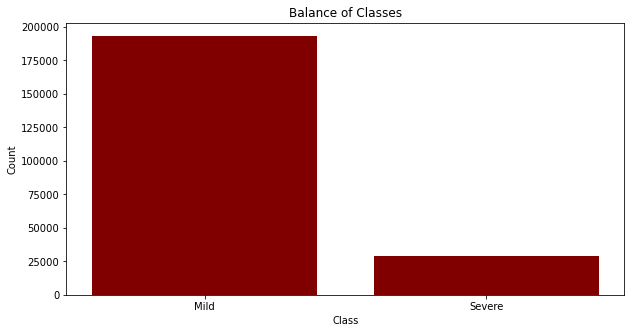

In [14]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(category, count, color = 'maroon')
 
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Balance of Classes")
plt.show()

In [15]:
part_encoded_df = results_df.copy()

# Encode with "get_dummies"
part_encoded_df = pd.get_dummies(part_encoded_df, columns=['res_state', 'race'])

# Encode "outcome"
le=LabelEncoder()

age_num={'0 - 17 years': 0, '18 to 49 years': 1, '50 to 64 years': 2, '65+ years': 3, 'Missing': 4}
part_encoded_df['age_num']=part_encoded_df['age_group'].apply(lambda x: age_num[x])

outcome_num={'mild': 0, 'severe': 1}
part_encoded_df['outcome_num']=part_encoded_df['outcome'].apply(lambda x: outcome_num[x])

part_encoded_df['sex'] = le.fit_transform(part_encoded_df['sex'])
part_encoded_df['symptom_status'] = le.fit_transform(part_encoded_df['symptom_status'])
part_encoded_df['underlying_conditions_yn'] = le.fit_transform(part_encoded_df['underlying_conditions_yn'])

results_encoded_df = part_encoded_df.copy()
results_encoded_df

,age_group,sex,symptom_status,underlying_conditions_yn,outcome,res_state_AK,res_state_AL,res_state_AR,res_state_CO,res_state_DC,...,res_state_WI,res_state_WY,race_American Indian/Alaska Native,race_Asian,race_Black,race_Multiple/Other,race_Native Hawaiian/Other Pacific Islander,race_White,age_num,outcome_num
0,50 to 64 years,1,1,1,severe,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1
1,18 to 49 years,0,1,1,mild,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0 - 17 years,1,1,1,mild,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18 to 49 years,0,1,1,mild,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,18 to 49 years,1,1,1,mild,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222339,18 to 49 years,1,1,1,severe,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
222340,65+ years,1,1,1,severe,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,1
222341,18 to 49 years,1,1,0,mild,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
222342,18 to 49 years,0,1,1,mild,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [16]:
# Drop le encoded columns
results_encoded_df = results_encoded_df.drop(['age_group'], axis=1)
results_encoded_df = results_encoded_df.drop(['outcome'], axis=1)

In [17]:
results_encoded_df

,sex,symptom_status,underlying_conditions_yn,res_state_AK,res_state_AL,res_state_AR,res_state_CO,res_state_DC,res_state_FL,res_state_GA,...,res_state_WI,res_state_WY,race_American Indian/Alaska Native,race_Asian,race_Black,race_Multiple/Other,race_Native Hawaiian/Other Pacific Islander,race_White,age_num,outcome_num
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222339,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
222340,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,1
222341,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
222342,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [18]:
X = results_encoded_df.copy()
X = X.drop("outcome_num", axis=1)
X

,sex,symptom_status,underlying_conditions_yn,res_state_AK,res_state_AL,res_state_AR,res_state_CO,res_state_DC,res_state_FL,res_state_GA,...,res_state_WA,res_state_WI,res_state_WY,race_American Indian/Alaska Native,race_Asian,race_Black,race_Multiple/Other,race_Native Hawaiian/Other Pacific Islander,race_White,age_num
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222339,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
222340,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
222341,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
222342,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [19]:
y = results_encoded_df["outcome_num"].values
y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(166758, 49)
(55586, 49)
(166758,)
(55586,)


# Logistic Regression Model

In [21]:
# Create Scaler instance and fit with training data

# scaler = StandardScaler().fit(X_train)
# X_scaler = scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled = MinMaxScaler().fit_transform(X_train)
# X_test_scaled = MinMaxScaler().fit_transform(X_test)


In [22]:
# Solvers = ‘lbfgs’, ‘newton-cg’, ‘sag’, ‘saga’

# Create Model
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, multi_class='auto', random_state=0,
                           solver='lbfgs', tol=0.0001, warm_start=False)

In [23]:
# Train Model
model.fit(X_train,y_train)
print("Training Data Score: %.3f" % model.score(X_train, y_train))
print("Test Data Score: %.3f" % model.score(X_test, y_test))

Training Data Score: 0.906
Test Data Score: 0.907


C:\Users\lkwor\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [24]:
predictions = model.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
55581,0,0
55582,0,0
55583,0,0
55584,0,0


In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
cm_df=pd.DataFrame(cm)
cm_df=pd.DataFrame(
    cm, index=["Actual Mild", "Actual Severe"],
    columns=["Predicted Mild", "Predicted Severe"])
cm_df

,Predicted Mild,Predicted Severe
Actual Mild,48206,117
Actual Severe,5073,2190


In [26]:
acc_score=accuracy_score(y_test, predictions)
acc_score

0.9066311661209657

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     48323
           1       0.95      0.30      0.46      7263

    accuracy                           0.91     55586
   macro avg       0.93      0.65      0.70     55586
weighted avg       0.91      0.91      0.88     55586

